In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
# 读取CSV文件
data = pd.read_csv('selected_columns_data.csv')

# 使用StandardScaler对整个数据集进行归一化
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data)

#### Elbow

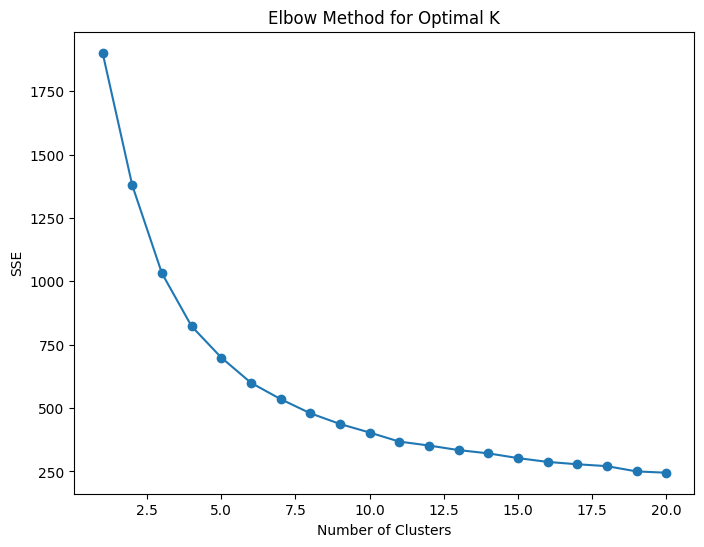

In [8]:
# 计算不同聚类个数下的SSE
sse = []
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(normalized_data)
    sse.append(kmeans.inertia_)

# 绘制手肘法图像
plt.figure(figsize=(8, 6))
plt.plot(range(1, 21), sse, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()


#### Calinski-Harabasz指数

Best number of clusters: 4


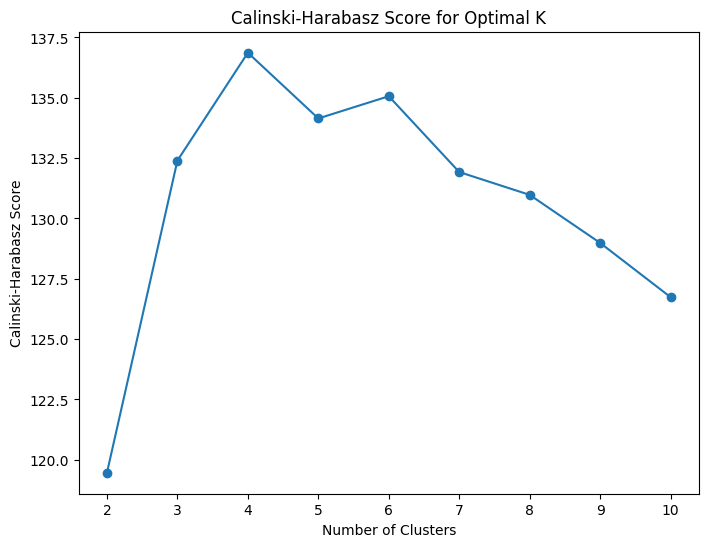

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
import matplotlib.pyplot as plt

# 读取CSV文件
data = pd.read_csv('selected_columns_data.csv')

# 使用StandardScaler对整个数据集进行归一化
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data)

# 寻找最佳聚类个数
best_score = -1
best_k = -1

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    clusters = kmeans.fit_predict(normalized_data)
    ch_score = calinski_harabasz_score(normalized_data, clusters)
    
    if ch_score > best_score:
        best_score = ch_score
        best_k = k

# 输出最佳聚类个数
print("Best number of clusters:", best_k)

# 可选：绘制Calinski-Harabasz指数随聚类个数变化的图像
ch_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    clusters = kmeans.fit_predict(normalized_data)
    ch_score = calinski_harabasz_score(normalized_data, clusters)
    ch_scores.append(ch_score)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), ch_scores, marker='o')
plt.title('Calinski-Harabasz Score for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Score')
plt.show()


#### 轮廓系数

Best number of clusters: 2


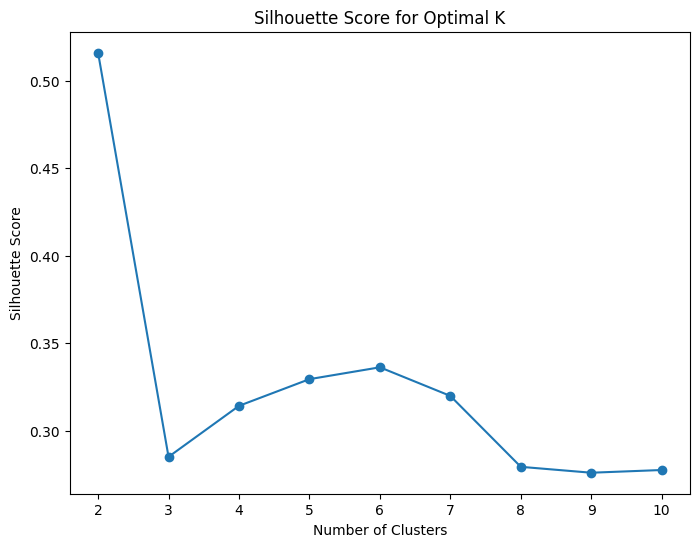

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 读取CSV文件
data = pd.read_csv('selected_columns_data.csv')

# 使用StandardScaler对整个数据集进行归一化
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data)

# 寻找最佳聚类个数
best_score = -1
best_k = -1

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    clusters = kmeans.fit_predict(normalized_data)
    silhouette_avg = silhouette_score(normalized_data, clusters)
    
    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_k = k

# 输出最佳聚类个数
print("Best number of clusters:", best_k)


silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    clusters = kmeans.fit_predict(normalized_data)
    silhouette_avg = silhouette_score(normalized_data, clusters)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


#### Davies-Bouldin指数

Best number of clusters: 6


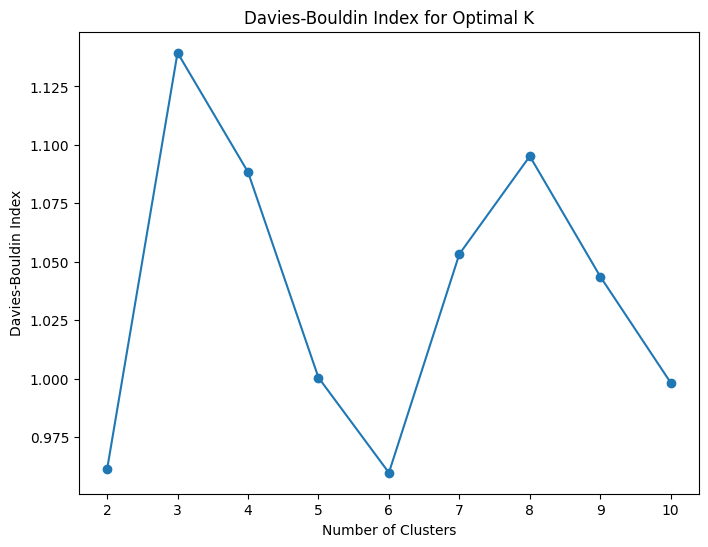

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 自定义Davies-Bouldin指数的计算函数
def davies_bouldin_score(data, clusters, centers):
    n_clusters = len(centers)
    cluster_distances = []

    for i in range(n_clusters):
        distances = np.linalg.norm(data[clusters == i] - centers[i], axis=1)
        cluster_distances.append(np.mean(distances))

    overall_score = 0.0
    for i in range(n_clusters):
        max_score = 0.0
        for j in range(n_clusters):
            if i != j:
                score = (cluster_distances[i] + cluster_distances[j]) / np.linalg.norm(centers[i] - centers[j])
                if score > max_score:
                    max_score = score
        overall_score += max_score

    return overall_score / n_clusters

# 读取CSV文件
data = pd.read_csv('selected_columns_data.csv')

# 使用StandardScaler对整个数据集进行归一化
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data)

# 寻找最佳聚类个数
best_score = float('inf')
best_k = -1

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    clusters = kmeans.fit_predict(normalized_data)
    centers = kmeans.cluster_centers_
    db_score = davies_bouldin_score(normalized_data, clusters, centers)
    
    if db_score < best_score:
        best_score = db_score
        best_k = k

# 输出最佳聚类个数
print("Best number of clusters:", best_k)

# 可选：绘制Davies-Bouldin指数随聚类个数变化的图像
db_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    clusters = kmeans.fit_predict(normalized_data)
    centers = kmeans.cluster_centers_
    db_score = davies_bouldin_score(normalized_data, clusters, centers)
    db_scores.append(db_score)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), db_scores, marker='o')
plt.title('Davies-Bouldin Index for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.show()
